In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install plotly==5.10.0
import plotly.graph_objects as go
!pip install plotly.express
import plotly.express as px
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Overview of the data

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Shape of the data (rows and columns) along with information about each column

In [ ]:
print(f'Shape of the data: {data.shape}')
print(f'There are {data.shape[0]} rows in the data.\n')

data.info()

Shape of the data: (1338, 7)
There are 1338 rows in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
categorical_cols = list(data.select_dtypes(include='object'))
numerical_cols = list(data.select_dtypes(include='number'))

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['sex', 'smoker', 'region']
Numerical columns: ['age', 'bmi', 'children', 'charges']


There are 3 categorical columns. There are 4 numerical columns in which Age, body mass index (BMI), and charges are classified as continuous numerical and the number of children is a discrete numerical .

If duplicate data exists in the dataset, it can cause bias in analysis and modeling. Duplicated data does not provide useful information, so removing it improves the quality of our understanding of the dataset.

In [ ]:
print('the total number of duplicated rows:',
      data.duplicated().sum())
data[data.duplicated(keep=False)]

the total number of duplicated rows: 1


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(keep='first', inplace=True)

print('the total number of duplicated rows:',
      data.duplicated().sum())

the total number of duplicated rows: 0


Find out if data has missing values

In [ ]:
missing_values = data.isnull().sum()

percentage_missing_values = (missing_values / len(data)) * 100
missing_data = pd.DataFrame(
    {'Total Missing Values': missing_values,
     'Percentage': percentage_missing_values})

missing_data

,Total Missing Values,Percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [ ]:
data[categorical_cols].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [ ]:
def val_counts(data, var):
    results = data[var].value_counts(sort=False)
    labels = results.index
    counts = results.values
    return labels, counts

labels = val_counts(data, 'sex')[0]
values= val_counts(data, 'sex')[1]
colors = ['#bb2b77','#95cbee']
explode = (0.05, 0)

def visualize_piechart(labels=None, values=None,
                       explode=None, colors=colors, var=None):

    fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                                 pull=explode,
                                 marker=dict(
                                     colors=colors,
                                     line=dict(color='#000000', width=2)))])

    fig.update_layout(
        legend=dict(
            x=0.5, y=1.15,
            xanchor='center',
            orientation='h',
            bgcolor='rgba(211,211,211,0.3)',
            font=dict(size=12)
        ),
        title=dict(text=f'{var} Distribution', x=0.5, y=0.95)
    )

    return fig.show()


In [ ]:
visualize_piechart(labels=labels, values= values,explode=explode,var='Gender')

The gender distribution of each respondent in
this dataset is almost even with 662 Females (49.5%) and 675 Males (50.5%)

In [ ]:
smoker_labels = val_counts(data, 'smoker')[0]
smoker_values= val_counts(data, 'smoker')[1]

visualize_piechart(labels=smoker_labels, values= smoker_values,
                   explode=explode,var='Smoker')

The majority of respondents were smokers with a total of 274 smokers (20.5%) and 1093 non-smokers (79.5%).

In [ ]:
query_smoker_no= data.query('smoker=="no"')
query_smoker_yes= data.query('smoker=="yes"')

labels_no = val_counts(query_smoker_no, 'sex')[0]
values_no= val_counts(query_smoker_no, 'sex')[1]
labels_yes = val_counts(query_smoker_yes, 'sex')[0]
values_yes= val_counts(query_smoker_yes, 'sex')[1]


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_no, values=values_no,
                     marker=dict(colors=colors)
                    ),
              row=1, col=1)
fig.add_trace(go.Pie(labels=labels_yes, values=values_yes,
                     marker=dict(colors=colors)
                    ),
              row=1, col=2)

fig.update_traces(hole=.4, hoverinfo="label+value+percent+name")

fig.update_layout(
    title_text="Distribution of Smoker by Gender",

    annotations=[dict(text='No', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Yes', x=0.81, y=0.5, font_size=20, showarrow=False)],

    legend=dict(x=0.5, y=1.1, xanchor='center',
        orientation='h',
        bgcolor='rgba(211,211,211,0.3)',
        font=dict(size=12))
)
fig.show()

1Among the 274 smokers, the proportion of males is higher than that of females. The percentage of male smokers is 58%, while the percentage of female smokers is 20%.

In [ ]:
labels_no = val_counts(query_smoker_no, 'region')[0]
values_no= val_counts(query_smoker_no, 'region')[1]
labels_yes = val_counts(query_smoker_yes, 'region')[0]
values_yes= val_counts(query_smoker_yes, 'region')[1]

colors= ['#A721F4','#F22E8B','#95cbee','#6A2EF2']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_no, values=values_no, marker=dict(colors=colors)),
              row=1, col=1)
fig.add_trace(go.Pie(labels=labels_yes, values=values_yes, marker=dict(colors=colors)),
              row=1, col=2)

fig.update_traces(hole=.4, hoverinfo="label+value+percent+name")

fig.update_layout(
    title_text="Distribution of Smoker by Region",
    annotations=[dict(text='No', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Yes', x=0.80, y=0.5, font_size=20, showarrow=False)],

    # Adjusting the position of legend
    legend=dict(x=0.5, y=1.1, xanchor='center',
        orientation='h',  # Horizontal orientation
        bgcolor='rgba(211,211,211,0.3)',  # legend background
        font=dict(size=12))
)
fig.show()

The Southeast region has the highest number of smokers compared to other regions.

we will try to look at the data distribution of Charges and BMI

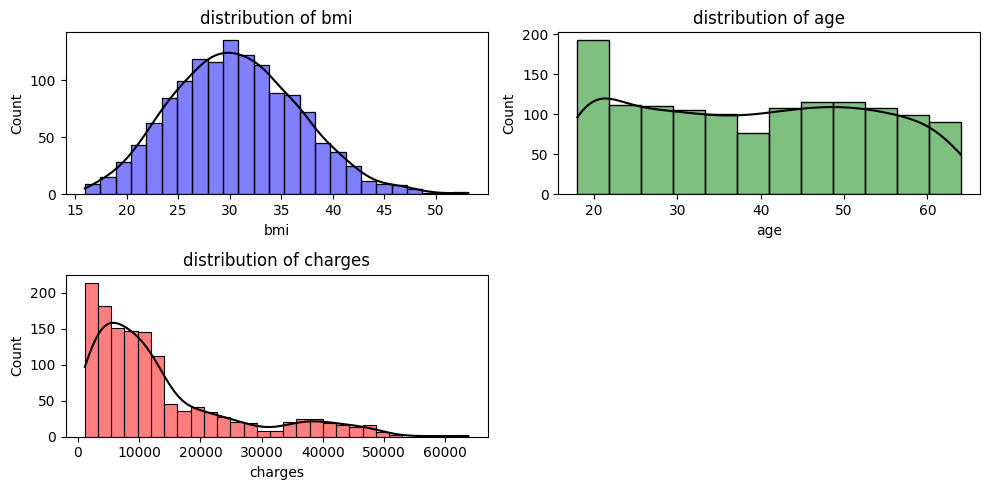

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
var_dict={'bmi':'blue','age':'green','charges': 'red'}
row_col = [(0, 0), (0, 1), (1, 0)]  # (row, col)
for i,(var,color) in enumerate(var_dict.items()):
    row, col= row_col[i]
    #row = (i // 2) + 1
    #col = (i % 2) + 1
    sns.histplot(data=data, x=var, kde=True, ax=axes[row, col], color=color)
    axes[row, col].set_title(f'distribution of {var}')
    axes[row, col].lines[0].set_color('black')

fig.delaxes(axes[1, 1])
plt.tight_layout()

plt.show()

In [ ]:
skewness_kurtosis = data[['bmi', 'age', 'charges']].agg(['skew', 'kurt'])
skewness_kurtosis

,bmi,age,charges
skew,0.283914,0.054781,1.515391
kurt,-0.052947,-1.244406,1.604221


The Age of the insured approximately follow a uniform distribution with lowest age being 18 and highest being 64.
The distribution of BMI tends to be normally distributed, while the charges are quite right-skewed or asymmetrical.
There are indications of outliers in the charges variable (many values are located at the tail of the distribution or at extreme points), because the kurtosis tends to be high and the distribution is positively skew. So, we will try to check it by box plot.

In [ ]:
def check_outliers(var):
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    total_outliers = len(data[(data[var] < lower_bound) | (data[var] > upper_bound)])
    return total_outliers, lower_bound, upper_bound

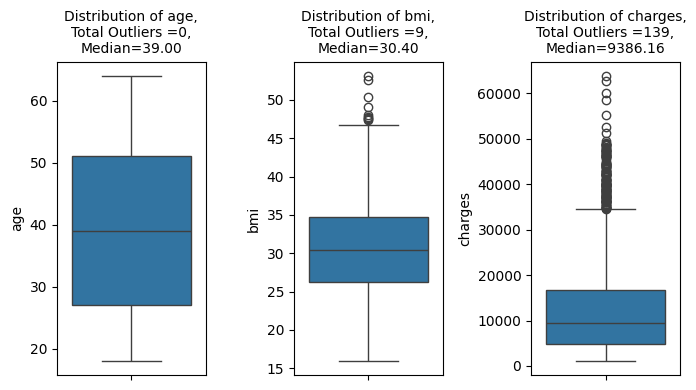

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(7, 4))

for i, var in enumerate(['age','bmi','charges']):
    sns.boxplot(data=data, y=var, ax=axes[i],)
    title= f'Distribution of {var},\nTotal Outliers ={check_outliers(var)[0]},\nMedian={data[var].median():.2f}'

    axes[i].set_title(title,fontsize=10)

plt.tight_layout()
plt.show()


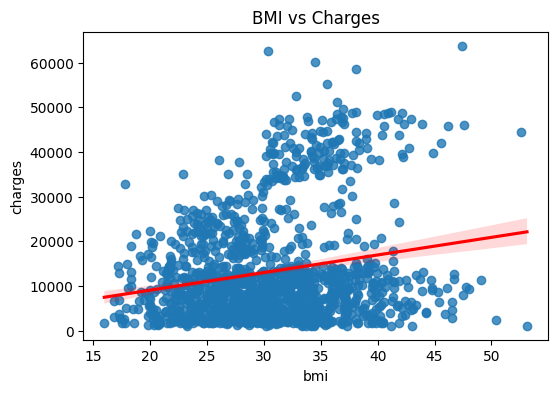

In [ ]:
plt.figure(figsize=(6,4))
sns.regplot(data=data, x='bmi', y='charges', line_kws={"color": "red"})
plt.title('BMI vs Charges');

Based on bivariate analysis, it seems that there is a slight linear relationship between BMI and Charges

In [ ]:
color = {'yes': '#DC143C', 'no': '#1E90FF'}
fig = px.scatter(data, x="bmi", y="charges", trendline="ols",
                 color='smoker', color_discrete_map=color)

fig.update_layout(
    height=500,
    width=600,
    title= 'Relationship between BMI, Charges, and Smoking Status'
)
fig.show()

Based on multivariate analyisis, we can see that there is a linear relationship between BMI and Charges (medical cost) when the status is a smoker. Smoking has the biggest impact on medical costs, it can be seen that charges tend to increase significantly as BMI increases.

In [ ]:
fig = px.scatter(data, x="age", y="charges", trendline="ols",
                 color='smoker',color_discrete_map=color)

fig.update_layout(
    height=500,
    width=600,
    title= 'Relationship between Age, Charges, and Smoking Status'
)
fig.show()

It seems that the insurance premiums tend to increase slightly with age for both smokers and non-smokers.

In [ ]:
# Because children are discrete numbers from 0-5, We use box plots to make it easier to see patterns from the data.
fig = px.box(data, x="children", y="charges", color="smoker",
            color_discrete_map=color)
fig.show()

 it can be seen that smokers tend to have high cost, whether they have few or many children. So we can assume that the number of children does not affect medical costs,

In [ ]:
fig = px.box(data, x="sex", y="charges",color='smoker',
            color_discrete_map=color)
fig.show()
data.query("smoker=='yes'").groupby(['sex'])['charges'].median().sort_values()

sex
female    28950.4692
male      36085.2190
Name: charges, dtype: float64

It appears that the insurance premiums for male smokers tend to be higher than those for females. However, this is likely due to the higher prevalence of smoking among males.

In [ ]:
fig = px.box(data, x="region", y="charges",
            color_discrete_map=color)
fig.show()
data.groupby(['region'])['charges'].median().sort_values()

region
southwest     8798.593000
northwest     8976.977250
southeast     9294.131950
northeast    10057.652025
Name: charges, dtype: float64

Based on the median value, it seems that the southwest region tends to have smaller medical costs compared to other regions, while the northeast has higher costs.

**BIVARIATE ANALYSIS**

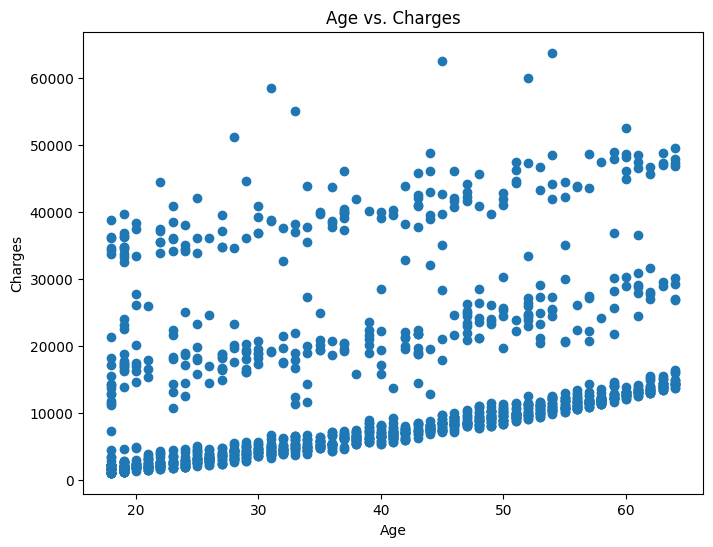

In [ ]:
# Visualization : Scatter plot of age vs. charges
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()

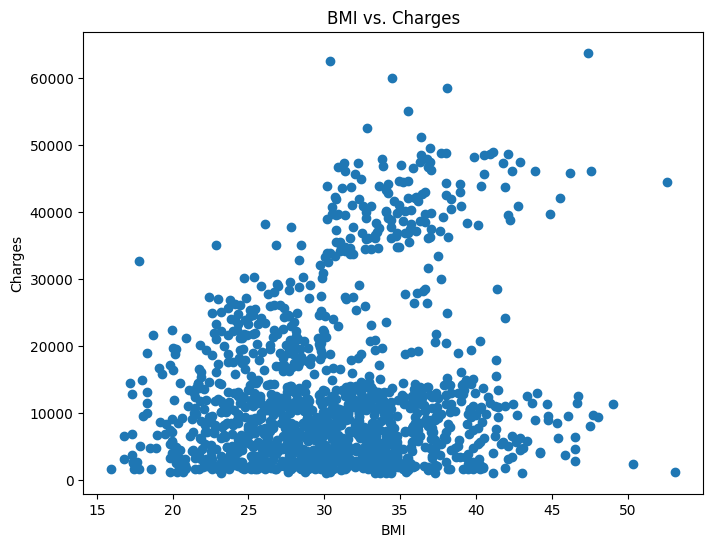

In [ ]:
# Visualization : Scatter plot of BMI vs. charges
plt.figure(figsize=(8, 6))
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()

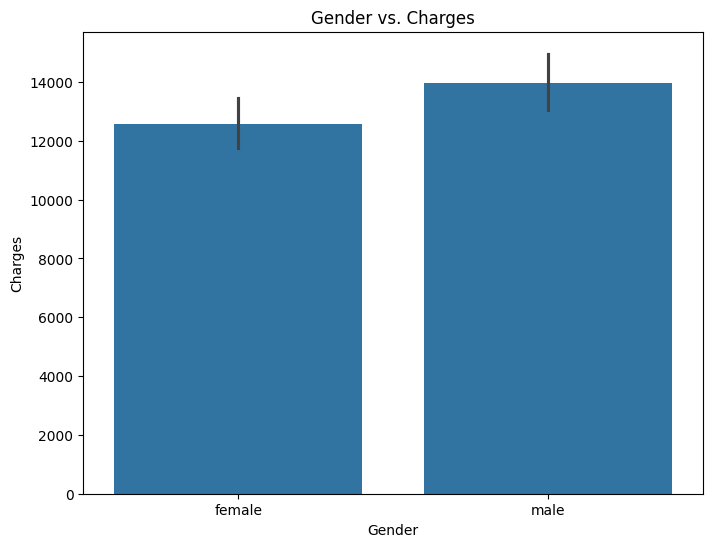

In [ ]:
# Grouped bar plot of gender vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs. Charges')
plt.show()

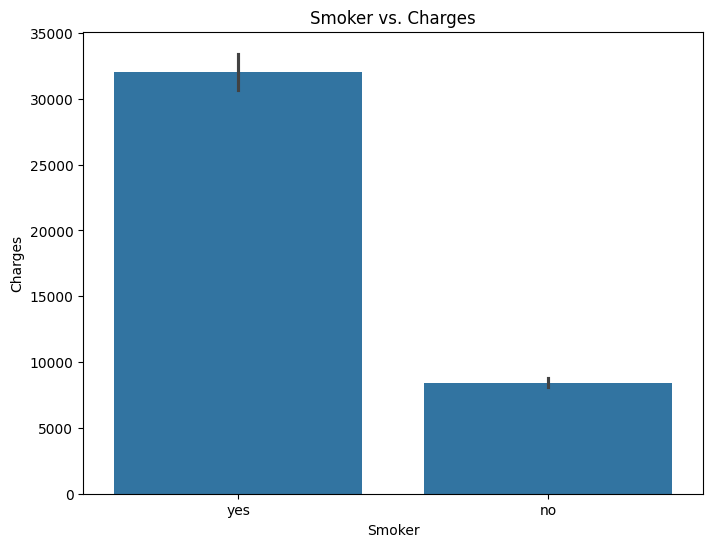

In [ ]:
# Grouped bar plot of smoker vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()


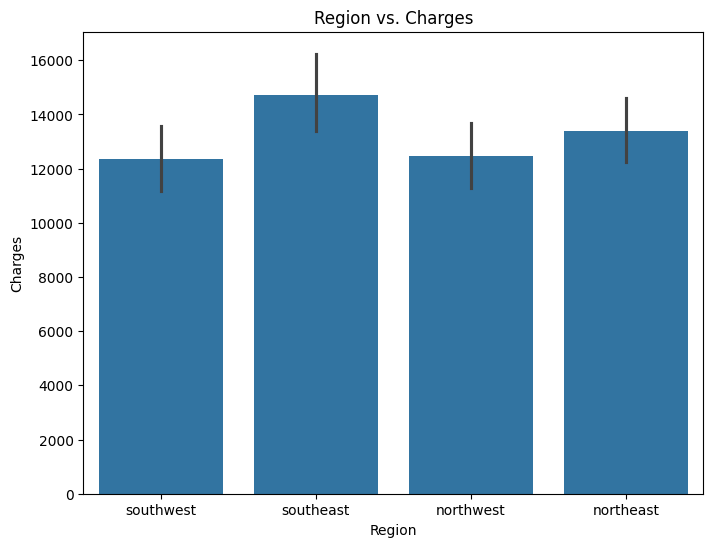

In [ ]:
# Stacked bar plot of region vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

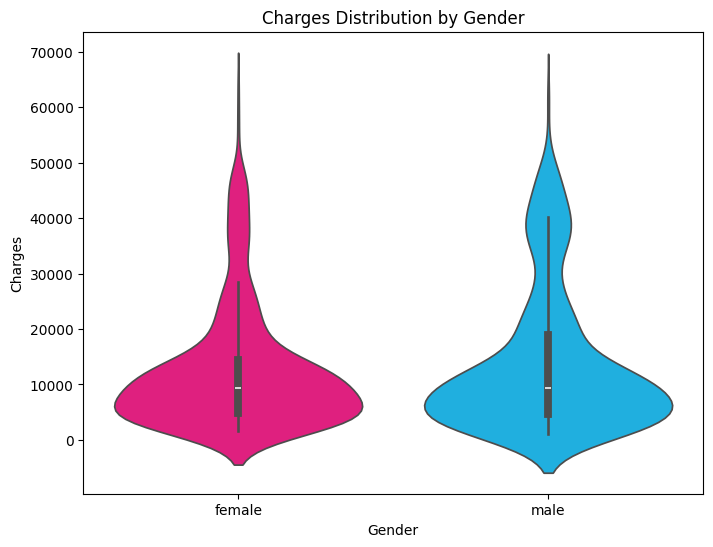

In [ ]:
# Violin plot of charges grouped by gender
colors = ["#FF007F", "#00BFFF"]
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='sex', y='charges',palette=colors)
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()


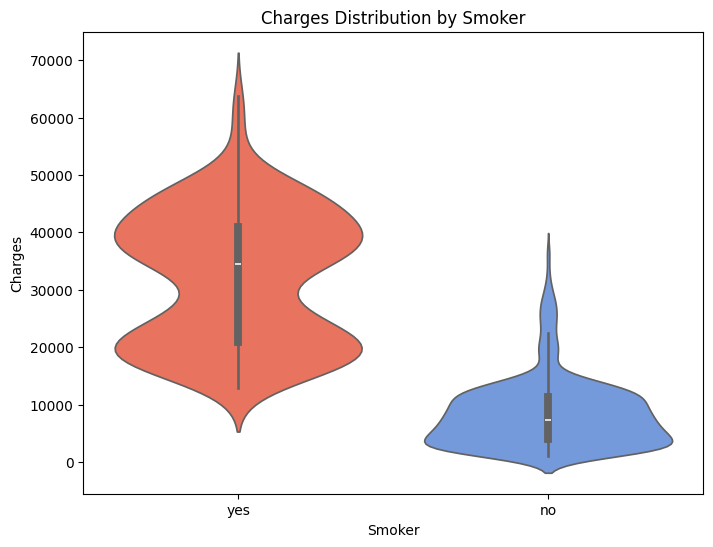

In [ ]:
#Violin plot of charges grouped by smoker vs. non-smoker
colors = ["#FF6347", "#6495ED"]
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='smoker', y='charges',palette=colors)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

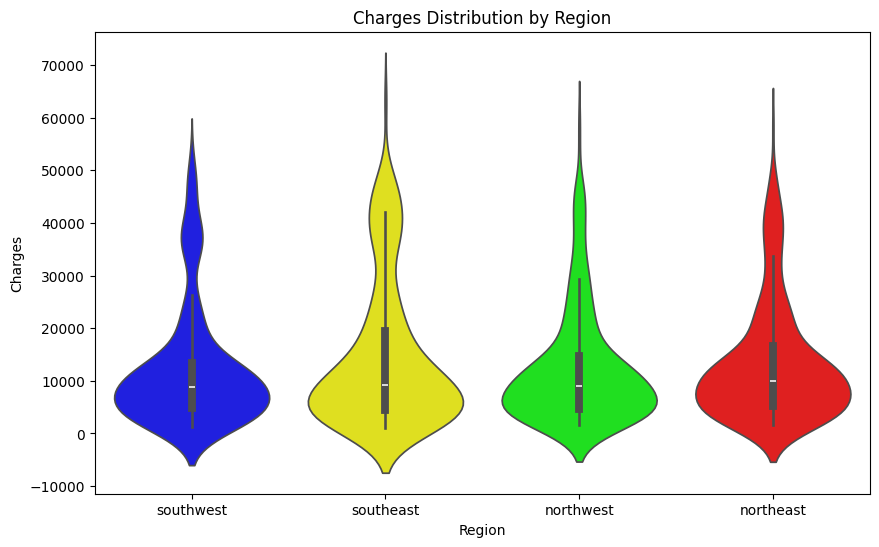

In [ ]:
# Violin plot of charges grouped by region
colors = ["#0000FF", "#FFFF00","#00FF00","#FF0000"]
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='region', y='charges',palette=colors)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

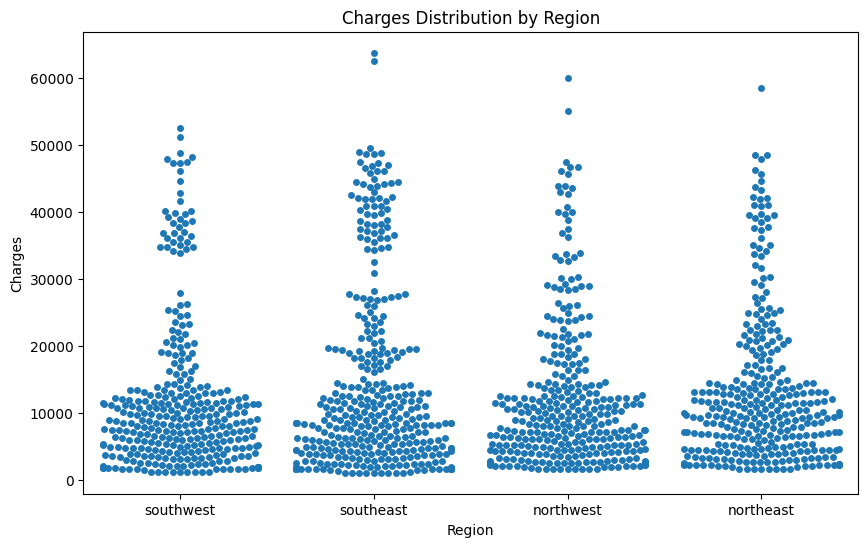

In [ ]:
# Swarm plot of charges grouped by region
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

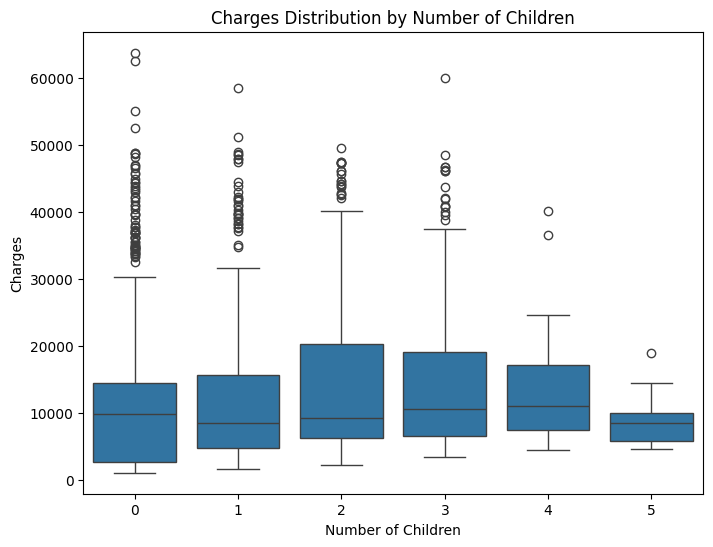

In [ ]:
# Box plot of charges grouped by the number of children
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='children', y='charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Charges Distribution by Number of Children')
plt.show()

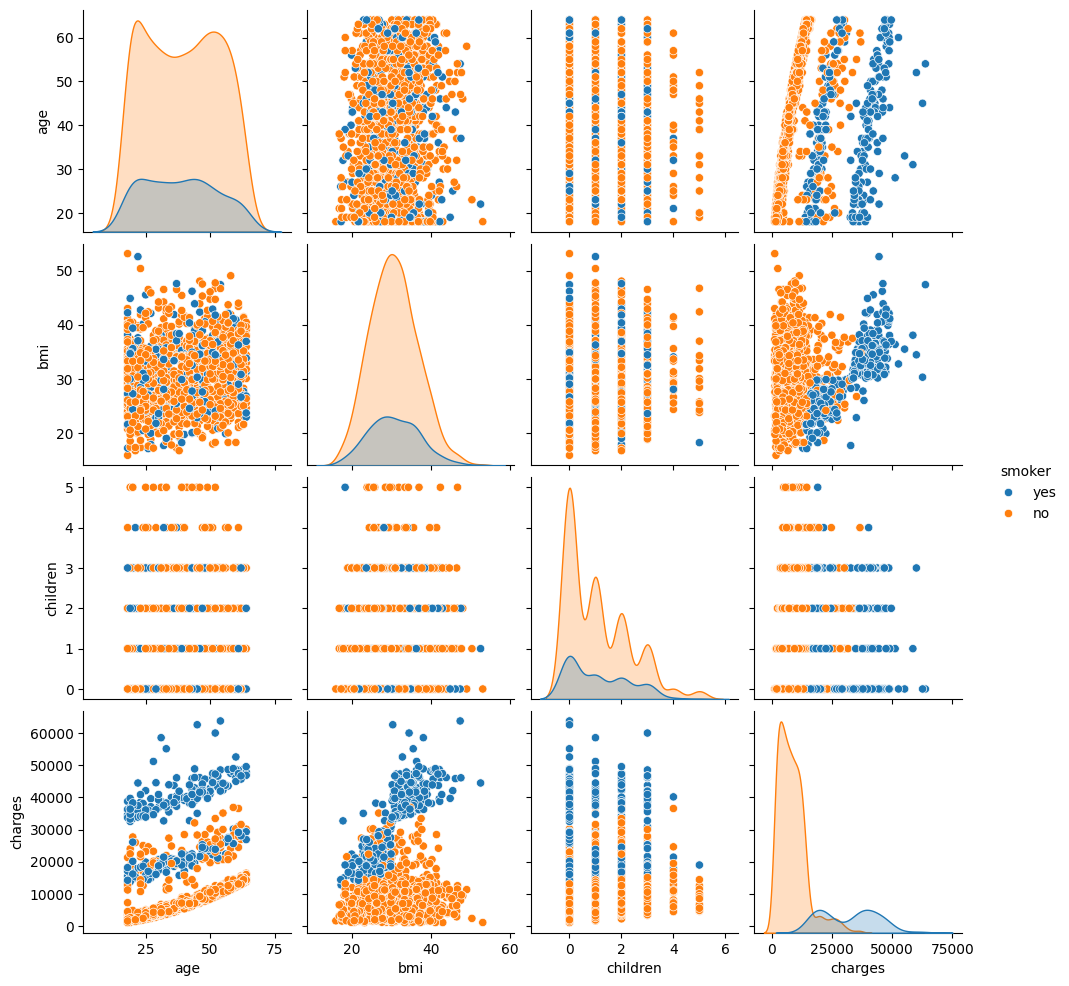

In [ ]:
sns.pairplot(data, hue='smoker')
plt.show()

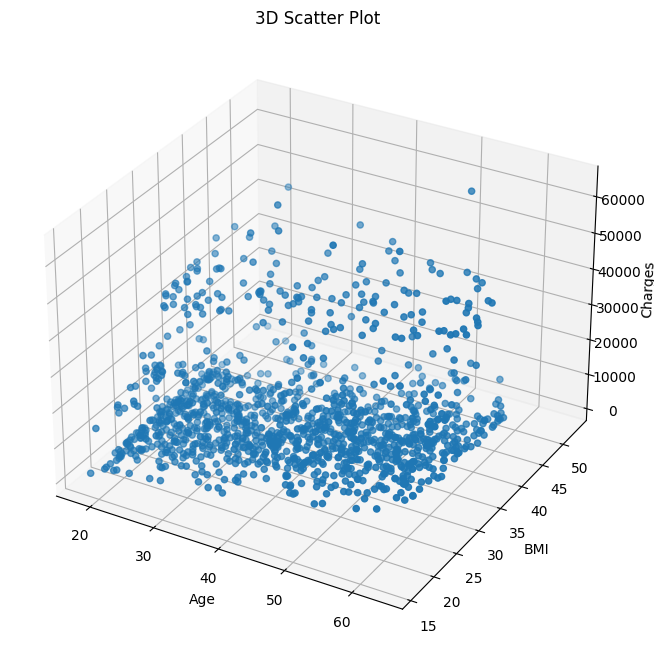

In [ ]:
#  3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['age'], data['bmi'], data['charges'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.title('3D Scatter Plot')
plt.show()

**HYPOTHESIS TESTING**

"Does the insurance bill for people who smoke differ significantly from people who don't smoke?"

To answer this question we will use hypothesis testing.

H0
 :  μs
  =  μn

HA
 :  μs
  !=  μn

Where:

μs
  = Mean Charges of all smokers
μn
  = Mean Charges of all non - smokers

In [ ]:
smokers = data.query("smoker=='yes'")
non_smokers = data.query("smoker=='no'")
charge_smokers = smokers['charges']
charge_non_smokers = non_smokers['charges']

print(f'Variance in charges of smokers: {np.var(charge_smokers):.2f}')
print(f'Variance in charges of non-smokers: {np.var(charge_non_smokers):.2f}')
print(f'mean in charges of smokers: {np.mean(charge_smokers):.2f}')
print(f'mean in charges of non-smokers: {np.mean(charge_non_smokers):.2f}')

In [ ]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(charge_smokers, charge_non_smokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: mean charges for smokers and non-smokers are different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean charges between smokers and non-smokers.")

t_statistic: 32.7423097372529
p_value: 6.261720774727631e-103
Reject the null hypothesis: mean charges for smokers and non-smokers are different.


Based on the results of t-test we will reject H0, but keep in mind that when using the t-test we assume the data distribution is normal, whereas we have checked that the data distribution on charges tends to be skewed and has outliers. Therefore, here we will test with Mann-Whitney U.

In [ ]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(charge_smokers, charge_non_smokers, alternative='two-sided')

print(f'Mann-Whitney U statistic: {statistic}')
print(f'p_value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in health insurance costs between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: No significant difference between smokers and non-smokers.")

Mann-Whitney U statistic: 283859.0
p_value: 5.74701188239214e-130
Reject the null hypothesis: There are significant differences in health insurance costs between smokers and non-smokers.


Based on the hypothesis testing we conducted, we conclude that the difference in the values of the two groups is not the result of mere chance, but has a strong basis from the data to be able to express a real or significant difference.

Next, we will attempt to check the correlation using Spearman correlation. We use Spearman because it is non-parametric, and therefore, it does not require the assumption of normally distributed data.

In [ ]:
data_new= data.copy()
data_new['smoker'] = data_new['smoker'].map({'no': 0, 'yes': 1})
data_new['sex'] = data_new['sex'].replace(['male','female'], [1,0])

data_encoded = pd.get_dummies(data_new, columns=['region'], dtype=float)

In [ ]:
data_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
88,46,0,27.740,0,0,8026.66660,0.0,1.0,0.0,0.0
985,44,0,25.800,1,0,7624.63000,0.0,0.0,0.0,1.0
420,64,1,33.880,0,1,46889.26120,0.0,0.0,1.0,0.0
378,64,0,30.115,3,0,16455.70785,0.0,1.0,0.0,0.0
525,18,0,33.880,0,0,11482.63485,0.0,0.0,1.0,0.0


In [ ]:
def viz_heatmap(data=None):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, fmt=".2f",
                cmap = 'bwr',
                mask=np.triu(data));

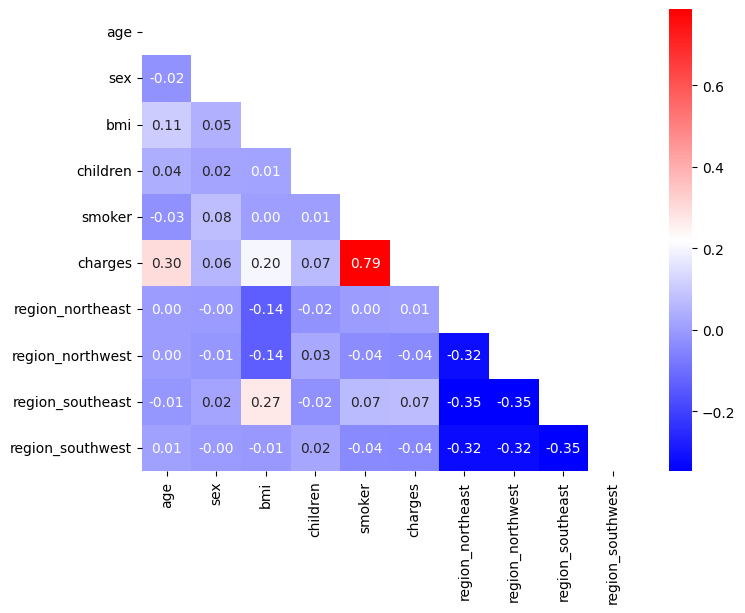

In [ ]:
corr_1 = data_encoded.corr(method='pearson')
viz_heatmap(data=corr_1)

Based on the analysis with Pearson correlation, we can observe that the "smoker" feature has a high correlation, approximately 79%. We can also see that the "age" feature has a correlation of 30%, and "bmi" has a correlation of 20%.

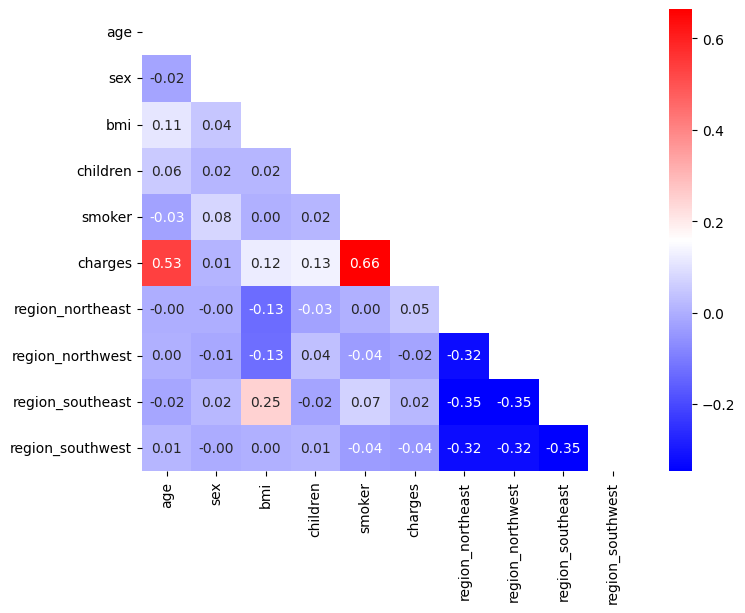

In [ ]:
corr_2 = data_encoded.corr(method='spearman')
viz_heatmap(data=corr_2)

Based on the analysis with Spearman correlation, we can observe that the "smoker" feature has a high correlation, approximately 66%. We can also see that the "age" feature has a correlation of 53%, and "bmi" has a correlation of 25%. This suggests that these features may still have a significant influence on insurance bills compared to other features with lower correlations.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(data[numerical_cols])

scaled_numerical_data = pd.DataFrame(scaled_numerical, columns=numerical_cols)

NameError: name 'data' is not defined

In [ ]:
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [ ]:
data.corr()['charges'].sort_values()


region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

In [ ]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [ ]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)


In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Data Preprocecssing
# New section

In [ ]:
X = data.drop('charges', axis = 1)
y = data['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

**Linear Regressiin model**

In [ ]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

In [ ]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))